In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<br>

## Object Creation
---

See the [Data Structure Intro section](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro).

### Create a Series

Create a **Series** by passing a list of values, letting pandas create a default integer index:

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

In [3]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

### Create a DataFrame

+ From a **numpy array**, with a datetime **index** and labeled **columns**:

In [4]:
dates = pd.date_range('20130101', periods = 6)

In [5]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [164]:
df = pd.DataFrame(np.random.randn(6, 4), index = dates, columns = list('ABCD'))

In [7]:
df

,A,B,C,D
2013-01-01,-0.063109,-0.289493,-0.472739,-0.965796
2013-01-02,0.299157,0.512665,0.154702,0.396002
2013-01-03,-0.274872,1.724364,-0.304003,-1.069135
2013-01-04,-0.950772,2.185025,1.129086,0.263437
2013-01-05,-0.219892,-0.658653,0.519777,0.297405
2013-01-06,-0.171816,-0.217592,-0.080754,-0.409240


* From a **dict** of objects that can be converted to series-like.

In [8]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })

In [9]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Having specific dtypes

In [10]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

`df2.<TAB>` helps look up the list of all available functions.

<br><br>

## Viewing Data
---
See the [Basics section](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics "Essential Basic Functionality")

See the top & bottom rows of the frame.

In [11]:
df.head()
df

,A,B,C,D
2013-01-01,-0.063109,-0.289493,-0.472739,-0.965796
2013-01-02,0.299157,0.512665,0.154702,0.396002
2013-01-03,-0.274872,1.724364,-0.304003,-1.069135
2013-01-04,-0.950772,2.185025,1.129086,0.263437
2013-01-05,-0.219892,-0.658653,0.519777,0.297405
2013-01-06,-0.171816,-0.217592,-0.080754,-0.409240


In [12]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.950772,2.185025,1.129086,0.263437
2013-01-05,-0.219892,-0.658653,0.519777,0.297405
2013-01-06,-0.171816,-0.217592,-0.080754,-0.409240


Display the index, colums, and the underlying numpy data.

In [13]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [14]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [15]:
df.values

array([[-0.06310919, -0.28949257, -0.4727385 , -0.96579559],
       [ 0.2991565 ,  0.51266456,  0.1547015 ,  0.39600153],
       [-0.27487207,  1.7243639 , -0.30400313, -1.06913451],
       [-0.95077213,  2.18502491,  1.1290864 ,  0.26343744],
       [-0.2198921 , -0.65865326,  0.51977735,  0.29740492],
       [-0.17181646, -0.21759171, -0.08075375, -0.40924027]])

Describe shows a quick statistic summary of your data.

In [16]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.230218,0.542719,0.157678,-0.247888
std,0.408135,1.166902,0.590285,0.661704
min,-0.950772,-0.658653,-0.472739,-1.069135
25%,-0.261127,-0.271517,-0.248191,-0.826657
50%,-0.195854,0.147536,0.036974,-0.072901
75%,-0.090286,1.421439,0.428508,0.288913
max,0.299157,2.185025,1.129086,0.396002


Transposing your data.

In [17]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.063109,0.299157,-0.274872,-0.950772,-0.219892,-0.171816
B,-0.289493,0.512665,1.724364,2.185025,-0.658653,-0.217592
C,-0.472739,0.154702,-0.304003,1.129086,0.519777,-0.080754
D,-0.965796,0.396002,-1.069135,0.263437,0.297405,-0.409240


Sorting by an axis.

In [18]:
df.sort_index(axis='columns',ascending = False) # Axis to be sorted. => axis{0 or ‘index’, 1 or ‘columns’}, default 0 

,D,C,B,A
2013-01-01,-0.965796,-0.472739,-0.289493,-0.063109
2013-01-02,0.396002,0.154702,0.512665,0.299157
2013-01-03,-1.069135,-0.304003,1.724364,-0.274872
2013-01-04,0.263437,1.129086,2.185025,-0.950772
2013-01-05,0.297405,0.519777,-0.658653,-0.219892
2013-01-06,-0.409240,-0.080754,-0.217592,-0.171816


In [19]:
df.sort_index(axis='index', ascending = False)

,A,B,C,D
2013-01-06,-0.171816,-0.217592,-0.080754,-0.409240
2013-01-05,-0.219892,-0.658653,0.519777,0.297405
2013-01-04,-0.950772,2.185025,1.129086,0.263437
2013-01-03,-0.274872,1.724364,-0.304003,-1.069135
2013-01-02,0.299157,0.512665,0.154702,0.396002
2013-01-01,-0.063109,-0.289493,-0.472739,-0.965796


<br><br>

## Selection
---

**Note:** While standard Python/Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at; .iat, .loc, .iloc and .ix.

See the indexing documentation [Indexing and Selecting Data](https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing "Indexing and Selecting Data") and [MultiIndex / Advanced Indexing](https://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced "MultiIndex / Advanced Indexing").

### Getting

Selecting a single column, which yields a *Series*.

In [20]:
df['A']

2013-01-01   -0.063109
2013-01-02    0.299157
2013-01-03   -0.274872
2013-01-04   -0.950772
2013-01-05   -0.219892
2013-01-06   -0.171816
Freq: D, Name: A, dtype: float64

In [21]:
df.A

2013-01-01   -0.063109
2013-01-02    0.299157
2013-01-03   -0.274872
2013-01-04   -0.950772
2013-01-05   -0.219892
2013-01-06   -0.171816
Freq: D, Name: A, dtype: float64

Selecting via `[]`, which slices the rows.

In [22]:
df[0 : 3]

,A,B,C,D
2013-01-01,-0.063109,-0.289493,-0.472739,-0.965796
2013-01-02,0.299157,0.512665,0.154702,0.396002
2013-01-03,-0.274872,1.724364,-0.304003,-1.069135


In [23]:
df['20130102' : '20130104']

,A,B,C,D
2013-01-02,0.299157,0.512665,0.154702,0.396002
2013-01-03,-0.274872,1.724364,-0.304003,-1.069135
2013-01-04,-0.950772,2.185025,1.129086,0.263437


### Selection by Label

See more in [Selection by Label](https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-label "Selection By Label").

For getting a cross section using a Label.

In [24]:
df.loc[dates[0]]

A   -0.063109
B   -0.289493
C   -0.472739
D   -0.965796
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label.

In [25]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,-0.063109,-0.289493
2013-01-02,0.299157,0.512665
2013-01-03,-0.274872,1.724364
2013-01-04,-0.950772,2.185025
2013-01-05,-0.219892,-0.658653
2013-01-06,-0.171816,-0.217592


Showing label slicing, both endpoints are _included_.

In [26]:
df.loc['20130102' : '20130104', ['A', 'B']]

,A,B
2013-01-02,0.299157,0.512665
2013-01-03,-0.274872,1.724364
2013-01-04,-0.950772,2.185025


Reduction in the dimensions of the returned object.

In [27]:
df.loc['20130102', ['A', 'B']]

A    0.299157
B    0.512665
Name: 2013-01-02 00:00:00, dtype: float64

<img src='https://bham-carpentries.github.io/2018-12-17-bham_python-novice-inflammation/fig/python-zero-index.png'>

For getting a scalar value

In [28]:
df.loc[dates[0], 'A']

-0.0631091925332389

For getting fast access to a scalar (equiv to the prior method)

In [29]:
df.at[dates[0], 'A']

-0.0631091925332389

### Selection by Position
See more in [Selection by Position](https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-integer "Selection by Position")

Select via the position of the passed integers

In [30]:
df.iloc[3]

A   -0.950772
B    2.185025
C    1.129086
D    0.263437
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to nump/python

In [31]:
df.iloc[3 : 5, 0 : 2]

,A,B
2013-01-04,-0.950772,2.185025
2013-01-05,-0.219892,-0.658653


By lists of integer position locations, similar to the numpy/python style.

In [32]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,0.299157,0.154702
2013-01-03,-0.274872,-0.304003
2013-01-05,-0.219892,0.519777


For slicing rows explicitly

In [33]:
df.iloc[1 : 3, :]

,A,B,C,D
2013-01-02,0.299157,0.512665,0.154702,0.396002
2013-01-03,-0.274872,1.724364,-0.304003,-1.069135


For slicing columns explicitly

In [34]:
df.iloc[:, 1 : 3]

,B,C
2013-01-01,-0.289493,-0.472739
2013-01-02,0.512665,0.154702
2013-01-03,1.724364,-0.304003
2013-01-04,2.185025,1.129086
2013-01-05,-0.658653,0.519777
2013-01-06,-0.217592,-0.080754


For getting a value explicitly

In [156]:
df.iloc[1, 1]

-1.6347117588926494

For getting fast access to a scalar (equiv to the prior method)

In [157]:
df.iat[1, 1]

-1.6347117588926494

### Boolean Indexing

Using a single column's values to select data.

Selecting values from a DataFrame where a boolean condition is met.

In [165]:
df[df > 0]

,A,B,C,D
2013-01-01,1.891029,NaN,NaN,NaN
2013-01-02,NaN,0.395735,NaN,0.648208
2013-01-03,NaN,NaN,1.137019,0.705985
2013-01-04,1.206898,NaN,NaN,NaN
2013-01-05,0.188806,1.218676,NaN,NaN
2013-01-06,1.341170,NaN,NaN,NaN


Using the `isin()` method for filtering:

In [166]:
df3 = df.copy()

In [167]:
df3['E'] = ['one', 'one', 'two', 'three', 'four', 'three']

In [41]:
df2

,A,B,C,D,E
2013-01-01,-0.063109,-0.289493,-0.472739,-0.965796,one
2013-01-02,0.299157,0.512665,0.154702,0.396002,one
2013-01-03,-0.274872,1.724364,-0.304003,-1.069135,two
2013-01-04,-0.950772,2.185025,1.129086,0.263437,three
2013-01-05,-0.219892,-0.658653,0.519777,0.297405,four
2013-01-06,-0.171816,-0.217592,-0.080754,-0.409240,three


### Setting

Setting a new column automatically aligns the data by the indexes.

In [168]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index = pd.date_range('20130102', periods = 6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

Setting values by label

In [170]:
df.at[dates[0], 'A'] = 0
df

,A,B,C,D
2013-01-01,0.000000,-0.409608,-0.978091,-0.767382
2013-01-02,-1.282566,0.395735,-1.391847,0.648208
2013-01-03,-1.233769,-0.824230,1.137019,0.705985
2013-01-04,1.206898,-0.057792,-0.056996,-1.445245
2013-01-05,0.188806,1.218676,-0.886095,-1.145879
2013-01-06,1.341170,-0.229723,-1.193349,-0.071845


Setting values by position

In [171]:
df.iat[0, 1] = 0

Setting by assigning with a numpy array

In [175]:
df.loc[:, 'D'] = np.array([5] * len(df))

In [173]:
df

,A,B,C,D
2013-01-01,0.000000,0.000000,-0.978091,5
2013-01-02,-1.282566,0.395735,-1.391847,5
2013-01-03,-1.233769,-0.824230,1.137019,5
2013-01-04,1.206898,-0.057792,-0.056996,5
2013-01-05,0.188806,1.218676,-0.886095,5
2013-01-06,1.341170,-0.229723,-1.193349,5


A **`where`** operation with setting.

In [183]:
df2 = df.copy()
df2

,A,B,C,D
2013-01-01,0.000000,0.000000,-0.978091,5
2013-01-02,-1.282566,0.395735,-1.391847,5
2013-01-03,-1.233769,-0.824230,1.137019,5
2013-01-04,1.206898,-0.057792,-0.056996,5
2013-01-05,0.188806,1.218676,-0.886095,5
2013-01-06,1.341170,-0.229723,-1.193349,5


In [177]:
df2[df2 > 0] = - df2

In [179]:
df2

,A,B,C,D
2013-01-01,0.000000,0.000000,-0.978091,-5
2013-01-02,-1.282566,-0.395735,-1.391847,-5
2013-01-03,-1.233769,-0.824230,-1.137019,-5
2013-01-04,-1.206898,-0.057792,-0.056996,-5
2013-01-05,-0.188806,-1.218676,-0.886095,-5
2013-01-06,-1.341170,-0.229723,-1.193349,-5


## Missing Data
---

pandas primarily uses the value `np.nan` to represent missing data. It is by default not included in computations. See the [Missing Data Section](https://pandas.pydata.org/pandas-docs/stable/missing_data.html#missing-data "Working with missing data")

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [50]:
df1 = df.reindex(index = dates[0 : 4], columns = list(df.columns) + ['E'])

In [182]:
df1

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-0.472739,5,1.0
2013-01-02,0.299157,0.512665,0.154702,5,1.0
2013-01-03,-0.274872,1.724364,-0.304003,5,NaN
2013-01-04,-0.950772,2.185025,1.129086,5,NaN


In [52]:
df1.loc[dates[0]: dates[1], 'E'] = 1

In [184]:
df1 

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-0.472739,5,1.0
2013-01-02,0.299157,0.512665,0.154702,5,1.0
2013-01-03,-0.274872,1.724364,-0.304003,5,NaN
2013-01-04,-0.950772,2.185025,1.129086,5,NaN


To drop any rows that have missing data.

In [185]:
df1.dropna(how = 'any')

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-0.472739,5,1.0
2013-01-02,0.299157,0.512665,0.154702,5,1.0


Filling missing data

In [186]:
df1.fillna(value = 5)

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-0.472739,5,1.0
2013-01-02,0.299157,0.512665,0.154702,5,1.0
2013-01-03,-0.274872,1.724364,-0.304003,5,5.0
2013-01-04,-0.950772,2.185025,1.129086,5,5.0


To get the boolean mask where values are `nan`

In [187]:
pd.isnull(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


## Operations
---
See the [Basic section on Binary Ops](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics-binop "Flexible binary operations")

### Stats

Operations in general _exclude_ missing data.

Performing a descriptive statistic.

 <img src= 'https://i.stack.imgur.com/FzimB.png'>  

 <img src='https://bham-carpentries.github.io/2018-12-17-bham_python-novice-inflammation/fig/python-operations-across-axes.png'>

In [188]:
df.mean()

A    0.036756
B    0.083778
C   -0.561560
D    5.000000
dtype: float64

In [192]:
df.mean(0)    # same as above

A    0.036756
B    0.083778
C   -0.561560
D    5.000000
dtype: float64

In [193]:
df.mean(axis='index')

A    0.036756
B    0.083778
C   -0.561560
D    5.000000
dtype: float64

Same operation on the other axis.

In [194]:
df.mean(1)

2013-01-01    1.005477
2013-01-02    0.680331
2013-01-03    1.019755
2013-01-04    1.523027
2013-01-05    1.380347
2013-01-06    1.229525
Freq: D, dtype: float64

In [195]:
df.mean(axis='columns')

2013-01-01    1.005477
2013-01-02    0.680331
2013-01-03    1.019755
2013-01-04    1.523027
2013-01-05    1.380347
2013-01-06    1.229525
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [197]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index = dates).shift(2)

In [198]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [62]:
df.sub(s, axis = 'index')

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-1.274872,0.724364,-1.304003,4.0
2013-01-04,-3.950772,-0.814975,-1.870914,2.0
2013-01-05,-5.219892,-5.658653,-4.480223,0.0
2013-01-06,NaN,NaN,NaN,NaN


### Apply

Applying functions to the data.

In [63]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.000000,0.000000,-0.472739,5
2013-01-02,0.299157,0.512665,-0.318037,10
2013-01-03,0.024284,2.237028,-0.622040,15
2013-01-04,-0.926488,4.422053,0.507046,20
2013-01-05,-1.146380,3.763400,1.026824,25
2013-01-06,-1.318196,3.545808,0.946070,30


In [64]:
df.apply(lambda x: x.max() - x.min())

A    1.249929
B    2.843678
C    1.601825
D    0.000000
dtype: float64

### Histogramming

See more at [Histogramming and Discretization](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization "Histogramming and Discretization").

In [65]:
s = pd.Series(np.random.randint(0, 7, size = 10))

In [66]:
s

0    3
1    5
2    3
3    2
4    3
5    0
6    2
7    6
8    5
9    6
dtype: int64

### String Methods

Series is equipped with a set of string processing methods in the _str_ attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in _str_ generally uses [regular expressions](https://docs.python.org/2/library/re.html "Regular expression operations") by default (and in some cases always uses them). See more at [Vectorizing String Methods](https://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods "Working with Text Data").

In [67]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [68]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

<br><br>

## Merge
---
### Concat

**`pd.concat()`** combines dataframes **vertically**.
See the [Merging section](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging "Merge, join, and concatenate").

Concatenating pandas objects together with **`concat()`**:

In [69]:
df = pd.DataFrame(np.random.randn(10, 4))

In [70]:
df

,0,1,2,3
0,1.745040,-0.260680,2.575059,1.655870
1,-0.582498,-0.000644,1.416941,-0.348084
2,-0.025829,-0.378580,-0.013212,-1.229030
3,1.248263,0.073312,0.388198,0.442331
4,-0.443365,0.334242,0.770574,1.177486
5,0.871731,1.337800,-0.034608,3.093426
6,0.346120,-1.668555,2.281382,-1.915070
7,-0.038014,-2.143728,-0.012197,0.612216
8,1.593407,1.192678,0.120728,0.072175
9,-0.206715,1.136560,-0.374542,-1.329205


Break it into pieces.

In [71]:
pieces = [df[: 3], df[3 : 7], df[7 : ]]

In [72]:
pieces

[          0         1         2         3
 0  1.745040 -0.260680  2.575059  1.655870
 1 -0.582498 -0.000644  1.416941 -0.348084
 2 -0.025829 -0.378580 -0.013212 -1.229030,
           0         1         2         3
 3  1.248263  0.073312  0.388198  0.442331
 4 -0.443365  0.334242  0.770574  1.177486
 5  0.871731  1.337800 -0.034608  3.093426
 6  0.346120 -1.668555  2.281382 -1.915070,
           0         1         2         3
 7 -0.038014 -2.143728 -0.012197  0.612216
 8  1.593407  1.192678  0.120728  0.072175
 9 -0.206715  1.136560 -0.374542 -1.329205]

In [73]:
pd.concat(pieces)

,0,1,2,3
0,1.745040,-0.260680,2.575059,1.655870
1,-0.582498,-0.000644,1.416941,-0.348084
2,-0.025829,-0.378580,-0.013212,-1.229030
3,1.248263,0.073312,0.388198,0.442331
4,-0.443365,0.334242,0.770574,1.177486
5,0.871731,1.337800,-0.034608,3.093426
6,0.346120,-1.668555,2.281382,-1.915070
7,-0.038014,-2.143728,-0.012197,0.612216
8,1.593407,1.192678,0.120728,0.072175
9,-0.206715,1.136560,-0.374542,-1.329205


### Join

**`pd.merge()`** merges dataframes **horizontally**. Just like SQL style merges. See the [Database style joining](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging-join "Database-style DataFrame joining/merging").

Example 1:

In [74]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [75]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [76]:
left

,key,lval
0,foo,1
1,foo,2


In [77]:
right

,key,rval
0,foo,4
1,foo,5


In [78]:
pd.merge(left, right, on = 'key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Example 2:

In [79]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})

In [80]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

In [81]:
left

,key,lval
0,foo,1
1,bar,2


In [82]:
right

,key,rval
0,foo,4
1,bar,5


In [83]:
pd.merge(left, right, on = 'key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### Append

Append rows to a dataframe. See the [Appending](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation "Concatenating using append").

In [84]:
df = pd.DataFrame(np.random.randn(8, 4), columns = ['A', 'B', 'C', 'D'])

In [85]:
df

,A,B,C,D
0,-0.282969,-0.317787,-1.691404,-0.593801
1,0.450848,0.936155,-0.859904,-1.547081
2,-0.550244,-0.413586,0.004536,-0.145594
3,1.112375,1.027738,-0.316437,1.318720
4,0.057875,1.039207,0.116171,-0.490772
5,-1.145517,-0.511263,-1.247371,0.831001
6,0.552648,0.986838,-1.136812,-0.666863
7,1.445047,-0.179429,0.578702,-0.236418


In [86]:
s = df.iloc[3]

In [87]:
s

A    1.112375
B    1.027738
C   -0.316437
D    1.318720
Name: 3, dtype: float64

In [88]:
df.append(s, ignore_index = True)

,A,B,C,D
0,-0.282969,-0.317787,-1.691404,-0.593801
1,0.450848,0.936155,-0.859904,-1.547081
2,-0.550244,-0.413586,0.004536,-0.145594
3,1.112375,1.027738,-0.316437,1.318720
4,0.057875,1.039207,0.116171,-0.490772
5,-1.145517,-0.511263,-1.247371,0.831001
6,0.552648,0.986838,-1.136812,-0.666863
7,1.445047,-0.179429,0.578702,-0.236418
8,1.112375,1.027738,-0.316437,1.318720


<br><br>

## Grouping
---
By "group by" we are referring to a process involving one or more of the following steps
- **Splitting** the data into groups based on some criteria
- **Applying** a function to each group independently
- **Combining** the results into a data structure

See the [Grouping Section](https://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby "Group By: split-apply-combine")

In [89]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})

In [90]:
df

,A,B,C,D
0,foo,one,-0.822870,-0.855150
1,bar,one,-0.338527,-1.284622
2,foo,two,-1.223927,0.588966
3,bar,three,-1.561605,2.118420
4,foo,two,1.902808,-0.060943
5,bar,two,-0.758301,-0.967357
6,foo,one,-1.311083,0.842935
7,foo,three,-1.107516,0.165673


Grouping and then applying a function **`sum`** to the resulting groups.

In [91]:
df.groupby('A').sum()

,C,D
A,,
bar,-2.658433,-0.133559
foo,-2.562588,0.681482


Grouping by multiple columns forms a hierarchical index, which we then apply the function.

In [92]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -0.338527 -1.284622
    three -1.561605  2.118420
    two   -0.758301 -0.967357
foo one   -2.133953 -0.012214
    three -1.107516  0.165673
    two    0.678881  0.528023

<br><br>

## Reshaping
---
See the sections on [Hierarchical Indexing](https://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical "Hierarchical indexing (MultiIndex)") and [Reshaping](https://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-stacking "Reshaping by stacking and unstacking").

### Stack

In [93]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))

In [94]:
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [95]:
index = pd.MultiIndex.from_tuples(tuples, names = ['first', 'second'])

In [96]:
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [97]:
df = pd.DataFrame(np.random.randn(8, 2), index = index, columns = ['A', 'B'])

In [98]:
df

A         B
first second                    
bar   one    -0.142975 -1.140727
      two    -0.237794 -0.536991
baz   one    -0.684444  0.564608
      two     0.470307  0.221726
foo   one     1.559395  0.166497
      two    -1.586111  0.264642
qux   one    -1.206587 -1.226525
      two    -0.011635  1.423396

In [99]:
df2 = df[: 4]

In [100]:
df2

A         B
first second                    
bar   one    -0.142975 -1.140727
      two    -0.237794 -0.536991
baz   one    -0.684444  0.564608
      two     0.470307  0.221726

The **`stack`** method "compresses" a level in the the DataFrame's columns.

In [101]:
stacked = df2.stack()

In [102]:
stacked

first  second   
bar    one     A   -0.142975
               B   -1.140727
       two     A   -0.237794
               B   -0.536991
baz    one     A   -0.684444
               B    0.564608
       two     A    0.470307
               B    0.221726
dtype: float64

With a "stacked" DataFrame or Series (having a `MultiIndex` as the `index`), the inverse operation of **`stack()`** is **`unstack()`**, which by default unstacks the **last level**:

In [103]:
stacked.unstack()

A         B
first second                    
bar   one    -0.142975 -1.140727
      two    -0.237794 -0.536991
baz   one    -0.684444  0.564608
      two     0.470307  0.221726

In [104]:
stacked.unstack(2)

A         B
first second                    
bar   one    -0.142975 -1.140727
      two    -0.237794 -0.536991
baz   one    -0.684444  0.564608
      two     0.470307  0.221726

In [105]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.142975 -0.237794
      B -1.140727 -0.536991
baz   A -0.684444  0.470307
      B  0.564608  0.221726

In [106]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.142975 -0.684444
       B -1.140727  0.564608
two    A -0.237794  0.470307
       B -0.536991  0.221726

### Pivot Tables

See the section on [Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-pivot "Pivot tables").

In [107]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})

In [108]:
df

,A,B,C,D,E
0,one,A,foo,0.026860,-0.365028
1,one,B,foo,-2.842617,0.764899
2,two,C,foo,0.579119,1.538779
3,three,A,bar,1.613214,-0.620913
4,one,B,bar,0.526816,0.690662
5,one,C,bar,1.863880,0.384504
6,two,A,foo,0.425087,2.286679
7,three,B,foo,0.312926,0.753860
8,one,C,foo,-0.937805,-0.124693
9,one,A,bar,0.657335,-2.782638


We can produce pivot tables from this data very easily:

In [109]:
pd.pivot_table(df, values = 'D', index = ['A', 'B'], columns = ['C'])

C             bar       foo
A     B                    
one   A  0.657335  0.026860
      B  0.526816 -2.842617
      C  1.863880 -0.937805
three A  1.613214       NaN
      B       NaN  0.312926
      C -0.699390       NaN
two   A       NaN  0.425087
      B  0.615953       NaN
      C       NaN  0.579119

<br><br>

## Time Series
---

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series section](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries "Time Series / Date functionality").

In [110]:
rng = pd.date_range('1/1/2012', periods = 100, freq = 'S')

In [111]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index = rng)

In [112]:
ts.resample('5Min').sum()

2012-01-01    23239
Freq: 5T, dtype: int64

Time zone representation

In [113]:
rng = pd.date_range('3/6/2012 00:00', periods = 5, freq = 'D')

In [114]:
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [115]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [116]:
ts

2012-03-06    1.016361
2012-03-07   -0.575171
2012-03-08    0.850706
2012-03-09    1.497709
2012-03-10    0.324142
Freq: D, dtype: float64

In [117]:
ts_utc = ts.tz_localize('UTC')

In [118]:
ts_utc

2012-03-06 00:00:00+00:00    1.016361
2012-03-07 00:00:00+00:00   -0.575171
2012-03-08 00:00:00+00:00    0.850706
2012-03-09 00:00:00+00:00    1.497709
2012-03-10 00:00:00+00:00    0.324142
Freq: D, dtype: float64

Convert to another time zone.

In [119]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    1.016361
2012-03-06 19:00:00-05:00   -0.575171
2012-03-07 19:00:00-05:00    0.850706
2012-03-08 19:00:00-05:00    1.497709
2012-03-09 19:00:00-05:00    0.324142
Freq: D, dtype: float64

Converting between time span representations.

In [120]:
rng = pd.date_range('1/1/2012', periods = 5, freq = 'M')

In [121]:
rng

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31'],
              dtype='datetime64[ns]', freq='M')

In [122]:
ts = pd.Series(np.random.randn(len(rng)), index = rng)

In [123]:
ts

2012-01-31    1.170265
2012-02-29    0.532879
2012-03-31   -1.171549
2012-04-30   -0.486713
2012-05-31   -0.205650
Freq: M, dtype: float64

In [124]:
ps = ts.to_period()

In [125]:
ps

2012-01    1.170265
2012-02    0.532879
2012-03   -1.171549
2012-04   -0.486713
2012-05   -0.205650
Freq: M, dtype: float64

In [126]:
ps.to_timestamp()

2012-01-01    1.170265
2012-02-01    0.532879
2012-03-01   -1.171549
2012-04-01   -0.486713
2012-05-01   -0.205650
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used.<br>
In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [127]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [128]:
prng

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]', freq='Q-NOV')

In [129]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [130]:
ts.head(3)

1990Q1    0.792926
1990Q2    0.745591
1990Q3    0.647665
Freq: Q-NOV, dtype: float64

In [131]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [132]:
ts.head()

1990-03-01 09:00    0.792926
1990-06-01 09:00    0.745591
1990-09-01 09:00    0.647665
1990-12-01 09:00   -2.402057
1991-03-01 09:00   -0.428723
Freq: H, dtype: float64

<br><br>

## Categoricals

Since version 0.15, pandas can include categorical data in a `DataFrame`. For full docs, see the [categorical introduction](https://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical "Categorical Data") and the [API documentation](https://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical "Categorical API").

In [133]:
df = pd.DataFrame({"id":[1, 2, 3, 4, 5, 6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

Convert the raw grades to a categorical data type using **`.astype()`**.

In [134]:
df["grade"] = df["raw_grade"].astype("category")

In [135]:
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


In [136]:
df["raw_grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: raw_grade, dtype: object

In [137]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names (assigning to **`Series.cat.categories`** is **inplace**!)

In [138]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [139]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): ['very good', 'good', 'very bad']

Reorder the categories and simultaneously add the missing categories (methods under **`Series .cat`** return a new `Series` per default).

In [140]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [141]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

**Sorting is per order in the categories, not lexical order.**

In [142]:
df.sort_values(by = "grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column shows also empty categories.

In [143]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

<br><br>

## Plotting
---
See the [Plotting docs](https://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization "Visualization").

In [144]:
ts = pd.Series(np.random.randn(1000), index = pd.date_range('1/1/2000', periods = 1000))

In [145]:
ts = ts.cumsum()

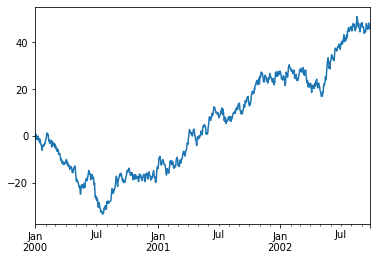

In [146]:
ts.plot()

![image](https://pandas.pydata.org/pandas-docs/stable/_images/series_plot_basic.png)

On DataFrame, **`plot()`** is a convenience to plot all of the columns with labels:

In [147]:
df = pd.DataFrame(np.random.randn(1000, 4), index = ts.index, columns = ['A', 'B', 'C', 'D'])

In [148]:
df = df.cumsum()

<Figure size 432x288 with 0 Axes>

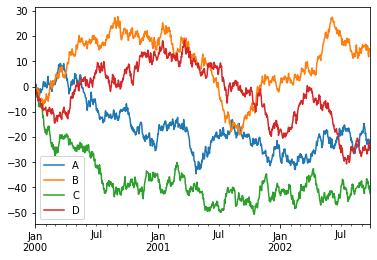

In [149]:
plt.figure();
df.plot();
plt.legend(loc = 'best')

![image](https://pandas.pydata.org/pandas-docs/stable/_images/frame_plot_basic.png)

<br><br>

## Getting Data In/Out
---
### CSV
[Writing to a csv file](https://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv "Writing to CSV format")

In [150]:
df.to_csv('foo.csv')

[Reading from a csv file](https://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table "Reading from a csv file")

In [151]:
pd.read_csv('foo.csv').head()

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.665199,0.665354,-1.443319,-1.774662
1,2000-01-02,-0.649513,-1.634712,-3.156772,-1.317429
2,2000-01-03,0.946328,-1.610697,-2.803141,-1.783035
3,2000-01-04,-0.749729,-1.299235,-3.210345,-1.455776
4,2000-01-05,-2.219343,-0.801051,-2.918876,-2.785147


### HDF5
Reading and writing to [HDFStores](https://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5 "HDF5 (PyTables)").

Writing to a HDF5 Store.

In [152]:
df.to_hdf('foo.h5', 'df')

Reading from a HDF5 Store.

In [153]:
pd.read_hdf('foo.h5','df').head()

,A,B,C,D
2000-01-01,0.665199,0.665354,-1.443319,-1.774662
2000-01-02,-0.649513,-1.634712,-3.156772,-1.317429
2000-01-03,0.946328,-1.610697,-2.803141,-1.783035
2000-01-04,-0.749729,-1.299235,-3.210345,-1.455776
2000-01-05,-2.219343,-0.801051,-2.918876,-2.785147


### Excel
Reading and writing to [MS Excel](https://pandas.pydata.org/pandas-docs/stable/io.html#io-excel "Excel files").

Writing to an excel file.

In [154]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

Reading from an excel file.

In [155]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA']).head()

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.665199,0.665354,-1.443319,-1.774662
1,2000-01-02,-0.649513,-1.634712,-3.156772,-1.317429
2,2000-01-03,0.946328,-1.610697,-2.803141,-1.783035
3,2000-01-04,-0.749729,-1.299235,-3.210345,-1.455776
4,2000-01-05,-2.219343,-0.801051,-2.918876,-2.785147


<br><br>

See [Comparisons](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics-compare "Flexible Comparisons") for an explanation and what to do.

See [Gotchas](https://pandas.pydata.org/pandas-docs/stable/gotchas.html#gotchas "Frequently Asked Questions (FAQ)") as well.